In this exercise you will be building a logistic regression model to
predict whether a student gets admitted into a university.

Suppose that you are the administrator of a university department and
you want to determine each applicant’s chance of admission based on their
results on two exams. You have historical data from previous applicants
that you can use as a training set for logistic regression. For each training
example, you have the applicant’s scores on two exams and the admissions
decision.

Your task is to build a classification model that estimates an applicant’s
probability of admission based on the scores from those two exams.


**Important**

The main logic of the training process is already implemented according to the below algorithm. You can find the code below ('train_Logistic_Regression_Model' function). You may want first go through that modul to gain understanding of how the training process takes place.  


**One iteration of the training process includes the following steps:**
 - Generate predictions (calclate the $\hat y$ values)
 - Calculate the loss (calclate the cost function J for current values w and b)
 - Calculate the partial derivatives of J with respect to the parameters w and b
 - Update the parameters w and b
 
All the above steps are reflected in the function 'train_Logistic_Regression_Model' function

#Logistic Regression

##1. Loading the data

First, let's read the data from the file. The file ex2data1.txt contains the training set. The first column stores the scores of the first exam, the second column stores the scores of the second exam, and the third column stores the admissions decision ('1' - applicant was addmitted, '0' - applicant was rejected).

In [1048]:
#Let's start from providing Colab access to Google Drive to be able load the file with the data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd

In [0]:
#read data from file
data = pd.read_csv('/content/drive/My Drive/Deep Learning/DL_HW2/hw2_data.txt', header = None)

Now, let's convert panadas dataframe to torch tensor and assign it to 'data' variable.
For some of the torch functions 'float32' is considered to be a default data type to work with. So, in order to ensure that the data is of 'float32' type, let's additionally apply float() method. (though, depending on the type of the inputs it already may be of float type).

For this exercise we'll keep the structure of the tensor as it is - training examples are stored in the rows.

In [0]:
import torch

In [0]:
# Convert data dataframe to torch tensor
data = torch.from_numpy(data.values).float()

##2. Visualizing the data

Before continuing, it is always good to
visualize the data if possible.

In [0]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show>

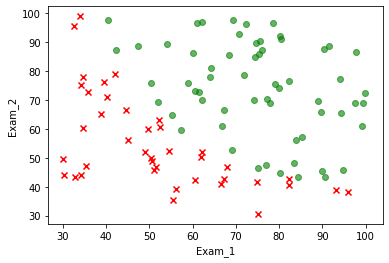

In [1054]:
plt.scatter(data[:,0][data[:,2]==0], data[:,1][data[:,2]==0], marker = 'x', color = 'red')
plt.scatter(data[:,0][data[:,2]==1], data[:,1][data[:,2]==1], marker = 'o', color = 'green', alpha = 0.6)
plt.xlabel('Exam_1')
plt.ylabel('Exam_2')
plt.show

In the above plot green dots specify positive outcome (applicant was accepeted) and the red once - negative (applicant wasn't accepted)

**The objective of this exercise is to build a classification model that will predict whether an applicant is going to be accepted to the university or not, based on the scores of his/her two exams.** 

##3.1 Splitting the data

For convenience, let's split the data to 'inputs' ($X$) and 'outputs'($y$). Another common names for 'inputs' is 'training examples', and for 'outputs' are 'lables' or 'targets' (other variants are also possible). 

 

**Note:** Many software bugs in deep learning come from having matrix/vector dimensions that don't fit. If you can keep your matrix/vector dimensions straight you will go a long way toward eliminating many bugs. 
As we agreed that the training examples are going to be stored in rows, after splitting the data we want to keep correspondance in between inputs ($X$) and outputs ($y$), i.e to access the features and the label of some $i^{th}$ training example with the same index $i$, like so: $X[i]$ and $y[i]$. It means that the shapes of $X$ and $y$ should be $[m, n]$ and $[m, 1]$ correspondingly, where $m$ - is the number of training examples and $n$ - number of features.    

**Exercise**: Split the data to $X$ and $y$ tensors and find values for m_X (number of training examples) and n_X (number of features)

In [1055]:
#GRADED TASK: 
# Assign the first two columns of the 'data' to 'X' tensor, and the third column of 'data' to 'y' tensor. You may find 'unsqueeze' method to be useful here
X = data[:,0:2]
y = data[:, 2].unsqueeze(1)

print('Shape of tensor X: ', X.shape)
print('Shape of tensor y: ', y.shape)
# Find values for m_X (number of training examples) and n_X (number of features)
n_X= X[:,0].numel()
n_y = X[0,:].numel()
###

print('Number of training examples:  ', n_X)
print('Number of features:  ', n_y)

Shape of tensor X:  torch.Size([100, 2])
Shape of tensor y:  torch.Size([100, 1])
Number of training examples:   100
Number of features:   2


**Expected output**:

                                             **X shape**    [100, 2]
                                             **y shape**    [100, 1]
                                             **Number of training examples**   100 
                                             **Number of features**   2








##4. General Architecture of the Logistic Regression learning algorithm

The below figure explains the Logistic Regression graphicly.

![alt text](https://drive.google.com/uc?id=1w3Y-LRI6MClC01ws5eCPJCOEDhqw1jp6)


**Mathematical expression of the algorithm:**

For one example $x^{(i)}$:
$$z^{(i)} = x^{(i)}w^T  + b \tag{1}$$
$$\hat{y}^{(i)} = a^{(i)} = sigmoid(z^{(i)})\tag{2}$$ 
$$ \mathcal{L}(a^{(i)}, y^{(i)}) =  - y^{(i)}  \log(a^{(i)}) - (1-y^{(i)} )  \log(1-a^{(i)})\tag{3}$$

The cost is then computed by summing over all training examples:
$$ J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(a^{(i)}, y^{(i)})\tag{4}$$


**Key steps:** 

In this exercise, you will carry out the following steps: 
- Initialize the parameters of the model 
- Learn the parameters for the model by minimizing the cost
- Use the learned parameters to make predictions (on the test set) 
- Analyse the results and conclude


##5. Building blocks of the Logistic Regression algorithm

###5.1 Sigmoid function

**Exercise**: Implement `sigmoid()`. As you've seen in the figure above, you need to compute $sigmoid( w^T x + b) = \frac{1}{1 + e^{-(xw^T + b)}}$ to make predictions.

In [0]:
#GRADED TASK: sigmoid
def sigmoid(z):
    s = 1/(1 + (torch.exp(-z)))
    return s

In [1057]:
print ("sigmoid([0., 2.]) = " + str(sigmoid(torch.tensor([0.,2.]))))

sigmoid([0., 2.]) = tensor([0.5000, 0.8808])


**Expected output**:

                                             **sigmoid([0., 2.])**    [0.5000, 0.8808]

###5.2 Initializing Parameters

**Exercise:** Implement parameter initialization in the cell below. You have to initialize w as a row-vector of zeros.

In [0]:
#GRADED TASK

# You may find torch.zeros() function useful

def initialize_with_zeros(dim):
  ###  START CODE HERE  ### (~ 2 line of code)
  w = torch.zeros(1, dim)
  b = torch.tensor([0.])
  ###  END CODE HERE  ###
  
  assert(w.shape == (1, dim))
    
  return w, b

In [1059]:
dim = 2
w1, b1 = initialize_with_zeros(dim)
print ("w1 = " + str(w1))
print ("b1 = " + str(b1))

w1 = tensor([[0., 0.]])
b1 = tensor([0.])


**Expected output**:

                                             **w1**    [[0., 0.]]
                                             **b1**     [0.]

###5.3 Forward Propagation

In Deep Learning, implementation of learning models are composed of two processes: forward pass (Forward Propagation) and backward pass (Backward Propagation). During the forward pass, the predictions ($\hat {y}$) and the cost ($J$) are calculated. 

####5.3.1 Defining the Model

**Exercise:** Build $'model()'$ function that implements the first part of the Forward Propagation - calculation of predictions ($\hat y$)

**Note:** In reality, the term $'model'$ has broader meaning, which we'll be exploring in later lectures. At this point we'll restrict ourselves to the above definition.

**Hints**:

Forward Propagation:
- You get X
- You compute $A = \sigma(Xw^T  + b) = (a^{(1)}, a^{(2)}, ..., a^{(m-1)}, a^{(m)})$


In [0]:
# GRADED TASK

def model(X, w, b):
  ###  START CODE HERE  ### (~ 2 lines of code) 
  z = X@w.t() + b
  a = sigmoid(z)
  ###  END CODE HERE  ###
  
  return a

In [1061]:
w1, b1, X1 = torch.tensor([[1., 2.]]), 2., torch.tensor([[1., 3.],[2., 4.],[-1, -3.2]])
print ("predictions(a) = " + str(model(X1, w1, b1)))



predictions(a) = tensor([[0.9999],
        [1.0000],
        [0.0045]])


**Expected output**:

                                             **predictions (a)**    [[0.9999],[1.0000],[0.0045]]
                                             

####5.3.2 Computing the cost $J(w,b)$

**Exercise:** Implement $'cost\_fn()'$ function that calculates the cost J 

In [0]:
#GRADED TASK

def cost_fn(a, y):
  m = y.numel()
  J = (-1/m) * ((y.t() @ torch.log(a) + (1 - y).t() @ torch.log(1 - a)))
  
  return J

In [1063]:
a1, y1 = torch.tensor([[0.3],[0.5],[0.1]]), torch.tensor([[1.],[0.],[1.]])
print ("cost_J = " + str(cost_fn(a1, y1)))

cost_J = tensor([[1.3999]])


**Expected output**:

                                             **cost_J**    [[1.3999]]
                                             

###5.4 Backward Propagation

Backward Pass (or Backward Propagation) starts after the completion of the Forward Pass, when we have the values for predictions (a) and cost J. During the backward pass the partial derivatives $dw$ and $db$ are calculated and the values $w$ and $b$ are updated.

####Computing partial derivatives $dw$ and $db$

**Exercise:** Implement $'backward'$ function that calculates the partial derivatives $dw$ and $db$

**Hints:** 
 - You need to implement the below two formulas: 
 - $a$ and $y$ in the formula (5) are column-vectors conteining $a^{(i)}$ and $y^{(i)}$ values correspondingly

$$ \frac{\partial J}{\partial w} = \frac{1}{m}(a-y)^TX\tag{5}$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})\tag{6}$$

In [0]:
def backward(X, a, y):
  m = y.numel()
  
  ###  START CODE HERE  ### (~ 2 lines of code)    
  dw = 1/m * ((a - y).t() @ X)
  db = 1/m * (a - y).sum()
  ###  END CODE HERE  ###
  
  return dw, db

In [1065]:
X1, a1, y1 = torch.tensor([[1., 3.],[2., 4.],[-1, -3.2]]), torch.tensor([[0.3],[0.5],[0.1]]), torch.tensor([[1.],[0.],[1.]])

dw1, db1 = backward(X1, a1, y1)

print('dw1 = ', dw1)
print('db1 = ', db1)

dw1 =  tensor([[0.4000, 0.9267]])
db1 =  tensor(-0.3667)


**Expected output**:

                                             **dw1**    [[0.4000, 0.9267]]
                                             **db1**    (-0.3667)
                                             

##6. Training the model

- You have initialized your parameters.
- You are able to compute the predictions ('model' function)
- You are also able to compute a cost function and its gradient.
- Now, it's time to put all the building blocks together to train our model.

**Note:** The second part (updating of the parameters $w$, and $b$) of the Backward Pass will be built in the main modul of the trainig cycle, though it is considered to be a separate step. Follow the description of the code below to find this part in the code 



The goal is to learn $w$ and $b$ parameters by minimizing the cost function $J$. For parameters $w$ and $b$, the update rules are $w = w - \alpha dw$,  and $b = b - \alpha db$ correspondingly, where $\alpha$ is the learning rate.

In [0]:
#Let's initialize the variables 'alpha' and 'epochs'
alpha = 0.03
epochs = 75000

**Exersice:** The code of the 'train_Logistic_Regression_Model' modul is final. No need to write any code here. Just look the code through to understands how it works.

In [0]:
# THIS MODUL IS FINAL AND COMPLETE

def train_Logistic_Regression_Model(X, y, alpha, epochs):
  J_history = [] #empty list where we will store the values of the cost function J
  
  w, b = initialize_with_zeros(X.shape[1]) # initialize parameters w and b by passing in the number of features

  for i in range(epochs):          # the training is an iterative process: repeat the process 'epochs' times
    # Forward pass:
    preds = model(X, w, b)         # calculate the predictions for the current values of w and b
    loss = cost_fn(preds, y)       # calculate the loss - value of the cost function for the current values of w and b
    #Backward pass:
    dw, db = backward(X, preds, y) # calculate the partial derivatives dw and db
    w -=  alpha*dw                    # update the values of w 
    b -=  alpha*db                    # update the value b


    if (i%10 == 0):               # save every 10-th value of the cost function J
      J_history.append(loss)       # append the loss value to the list J_history
      
  return w, b, J_history           # return the final values for w, b, and J_history

In [1068]:
%time w, b, J_h = train_Logistic_Regression_Model(X, y,alpha, epochs)

CPU times: user 15.1 s, sys: 4.89 ms, total: 15.1 s
Wall time: 15.1 s


In [1069]:
print('w = ', w)
print('b = ', b)

w =  tensor([[1.1315, 1.0292]])
b =  tensor([-129.0164])


**Expected output**: If you implemented all the above tasks correctly, you are supposed to see the following values for w and b:

                                             **w**    [[0.0453, 0.0382]]
                                             **b**    [-4.8117]
                                             

##Post-training analysis

After the training has been implemented, it is time to analize what we've obtained

###Plotting the historical values of the cost function J

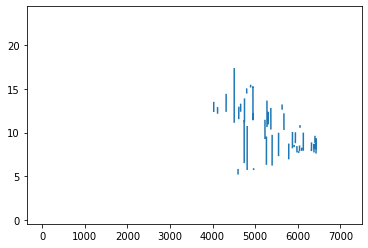

In [1070]:
plt.plot(J_h)

###Checking the accuracy of the model

In [0]:
A = sigmoid(X@w.t() + b)
Y_prediction = (A > 0.5).float() 

In [1072]:
print("train accuracy: {} %".format(100 - torch.mean(torch.abs(Y_prediction - y)) * 100))

train accuracy: 93.0 %


**Expected output:**

train accuracy: 91.0 %

###Plotting the Desicion Boundary

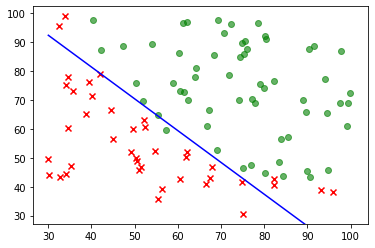

In [1073]:
plt.scatter(X[:,0][y[:,0]==0], X[:,1][y[:,0]==0], marker = 'x', color = 'red')
plt.scatter(X[:,0][y[:,0]==1], X[:,1][y[:,0]==1], marker = 'o', color = 'green', alpha = 0.6)
ax = plt.gca()
ax.autoscale(False)
x_vals = torch.tensor([min(X[:,0]), max(X[:,0])])
y_vals = -(w[0,0]*x_vals + b)/w[0,1]
plt.plot(x_vals.numpy(), y_vals.numpy(), c="blue")

In [1074]:
w.shape
#d = torch.tensor([[50], [60]], dtype = torch.float32)
#d.shape

torch.Size([1, 2])

In [0]:
#GRADED TASK: implement 'predict' function
#function accepts two arguments (values of scores for exam1 and exam2) and returns 'Yes' or 'No' dependig on predictions of the above trained model:
# 'Yes' - model predicts that student will be accepted; 'No' - model predicts that student will not be accepted:
def predict(e1, e2):
#START CODE HERE
  d = torch.tensor([[e1], [e2]], dtype = torch.float32)
  admission = sigmoid(w@d + b)
  return admission.item()  
#END CODE HERE

In [1076]:
predict(50,60)

2.279597356391605e-05

**Expected output:**

Value of the hypothesis function y_hat: 0.4362827241420746

No

In [0]:
#GRADED TASK
# List and describe what is(are) the potential improvement(s) that we could implement and boost the performance of the training process

##### ANSWER:
#I guess we could change the epochs and learning rate. I have also tried several different initialization techniques for w and b. I have also tried doing feature normalization. 


In [0]:
#GRADED TASK
# Copy this notebook, implement the suggested improvement(s) and compare the results

##### ANSWER:
#Initializing with ones or random numbers for w and b resulted in a significantly low accuracy rate and the time did not decrease. Feature normalization did not change anything in the accuracy rate and time measures. 
#The results were expected to be such. At last I tried also changing the alpha and and the number of epochs. This considerably changed the accuracy and time measures. I have made the number of epochs equal to 
#75,000 to make sure that the training time decreases, while at the same time the accuracy is not decreasing signifcantly. I have tried also increasing the learning rate. I set it to 0.03. 
#The accuracy with these changes is 93%, which is higher than the previous accuracy by 2 percentage points. The time measure has also decreased from around 20.0 seconds to 15.1 seconds. When I have tried to increase 
#the alpha a little bit more or decrease the number of epochs, the accuracy drastically dropped to around 68%. 



